In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

NR_SAMPLES_PER_HOUR = 6
# 10 minutes
MINUTES_BETWEEN_SAMPLES = int(60 / NR_SAMPLES_PER_HOUR)


def load_cpu_stats(filename):
    # TODO: will load from file, get random cpu stats firstly
    def create_stats_list(start, stop, hours):
        # 0.0 ~ 1.0 -> 0% ~ 100%
        return [random.randrange(start, stop) / 100.0 for i in range(len(hours) * NR_SAMPLES_PER_HOUR)]
    stats = []
    hours = range(0, 5)
    stats.extend(create_stats_list(5, 20, hours))
    hours = range(5, 19)
    stats.extend(create_stats_list(75, 100, hours))
    hours = range(19, 24)
    stats.extend(create_stats_list(5, 20, hours))
    return stats


def calc_idle_threshold(stats, max_threshold=75):
    #return 50
    copy_stats = list(stats)
    copy_stats.sort()
    index = int(len(copy_stats) / 3)
    threshold = copy_stats[index]
    if threshold > max_threshold:
        threshold = max_threshold
    return threshold


def generate_idle_map(stats):
    threshold = calc_idle_threshold(stats)
    # 1: busy, 0: idle
    return [0 if p < threshold else 1 for p in stats]


def merge_idle_map(idle_map1, idle_map2):
    return list(map(lambda x, y: 0 if x == 0 and y == 0 else 1, idle_map1, idle_map2))


def collect_idle_time_windows(idle_map):
    time_windows = {}
    nr_idle = 0
    for index, value in enumerate(idle_map):
        if value == 0:
            nr_idle += 1
        else:
            if nr_idle > 0:
                # key: start sample index
                # value: number of idle samples
                time_windows[index - nr_idle] = nr_idle
                nr_idle = 0
    else:
        if nr_idle > 0:
            time_windows[index - nr_idle] = nr_idle
    # sort by value from max to min
    # returns: [(k1,v1), (k2,v2), ...]
    return sorted(time_windows.items(), key=lambda item: item[1], reverse=True)


def show_idle_time_windows(idle_time_window):
    print("")
    for t in idle_time_window:
        start_hour = int(t[0] / NR_SAMPLES_PER_HOUR)
        start_minute = (t[0] % NR_SAMPLES_PER_HOUR) * MINUTES_BETWEEN_SAMPLES
        end_hour = int((t[0] + t[1]) / NR_SAMPLES_PER_HOUR)
        end_minute = ((t[0] + t[1]) % NR_SAMPLES_PER_HOUR) * MINUTES_BETWEEN_SAMPLES
        print("{:>02d}:{:>02d} ~ {:>02d}:{:>02d} -> {:<3d} minutes".format(start_hour, start_minute, end_hour, end_minute, MINUTES_BETWEEN_SAMPLES * t[1]))
        

def draw_pic(title, data):
    x = np.linspace(0,len(data)-1,len(data))
    y = np.array(data)
    plt.plot(x, y)
    plt.title(title)
    plt.show()

In [15]:
# 3 days data
day1_stats = load_cpu_stats("")
day2_stats = load_cpu_stats("")
day3_stats = load_cpu_stats("")

day1_idle_map = generate_idle_map(day1_stats)
day2_idle_map = generate_idle_map(day2_stats)
day3_idle_map = generate_idle_map(day3_stats)

day1_idle_time_windows = collect_idle_time_windows(day1_idle_map)
day2_idle_time_windows = collect_idle_time_windows(day2_idle_map)
day3_idle_time_windows = collect_idle_time_windows(day3_idle_map)

In [16]:
print(day1_stats)
print(calc_idle_threshold(day1_stats))
print(day1_idle_map)
show_idle_time_windows(day1_idle_time_windows)

[0.19, 0.1, 0.19, 0.14, 0.05, 0.15, 0.05, 0.16, 0.06, 0.15, 0.18, 0.13, 0.12, 0.05, 0.11, 0.13, 0.12, 0.13, 0.08, 0.14, 0.12, 0.09, 0.12, 0.12, 0.17, 0.14, 0.16, 0.1, 0.14, 0.09, 0.89, 0.93, 0.9, 0.91, 0.83, 0.89, 0.94, 0.89, 0.8, 0.97, 0.87, 0.93, 0.97, 0.95, 0.86, 0.77, 0.94, 0.83, 0.83, 0.87, 0.79, 0.91, 0.97, 0.97, 0.84, 0.79, 0.99, 0.86, 0.98, 0.8, 0.75, 0.86, 0.89, 0.94, 0.9, 0.97, 0.91, 0.81, 0.91, 0.86, 0.78, 0.84, 0.79, 0.76, 0.96, 0.95, 0.88, 0.94, 0.92, 0.97, 0.81, 0.88, 0.91, 0.79, 0.86, 0.92, 0.99, 0.92, 0.94, 0.93, 0.87, 0.81, 0.84, 0.76, 0.9, 0.84, 0.81, 0.91, 0.93, 0.88, 0.99, 0.94, 0.8, 0.88, 0.77, 0.85, 0.76, 0.81, 0.84, 0.87, 0.75, 0.91, 0.84, 0.79, 0.16, 0.07, 0.19, 0.09, 0.11, 0.14, 0.08, 0.12, 0.06, 0.13, 0.06, 0.17, 0.11, 0.05, 0.1, 0.1, 0.09, 0.06, 0.05, 0.06, 0.17, 0.09, 0.15, 0.15, 0.12, 0.07, 0.17, 0.13, 0.17, 0.14]
0.16
[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

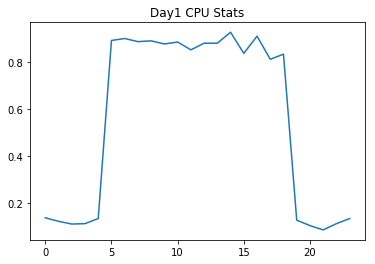

In [17]:
stats=[]
for index,value in enumerate(day1_stats):
    if index % NR_SAMPLES_PER_HOUR == 0:
        val = sum(day1_stats[index:index+NR_SAMPLES_PER_HOUR]) / NR_SAMPLES_PER_HOUR
        stats.append(val)

draw_pic('Day1 CPU Stats', stats)

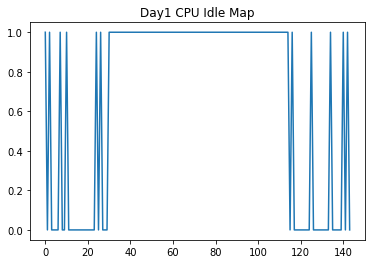

In [18]:
draw_pic('Day1 CPU Idle Map', day1_idle_map)

In [19]:
print(day2_stats)
print(calc_idle_threshold(day2_stats))
print(day2_idle_map)
show_idle_time_windows(day2_idle_time_windows)

[0.07, 0.16, 0.17, 0.16, 0.14, 0.15, 0.05, 0.15, 0.13, 0.16, 0.07, 0.18, 0.07, 0.07, 0.1, 0.15, 0.14, 0.16, 0.18, 0.18, 0.15, 0.15, 0.09, 0.07, 0.06, 0.05, 0.09, 0.07, 0.05, 0.07, 0.89, 0.85, 0.98, 0.8, 0.8, 0.75, 0.92, 0.75, 0.93, 0.78, 0.97, 0.92, 0.98, 0.91, 0.99, 0.94, 0.78, 0.96, 0.8, 0.75, 0.77, 0.76, 0.81, 0.77, 0.89, 0.75, 0.83, 0.89, 0.76, 0.81, 0.78, 0.9, 0.93, 0.92, 0.84, 0.79, 0.81, 0.75, 0.82, 0.8, 0.84, 0.79, 0.78, 0.95, 0.8, 0.94, 0.75, 0.91, 0.82, 0.83, 0.88, 0.85, 0.97, 0.85, 0.83, 0.86, 0.78, 0.86, 0.97, 0.93, 0.83, 0.9, 0.77, 0.83, 0.81, 0.97, 0.88, 0.86, 0.89, 0.77, 0.87, 0.95, 0.92, 0.97, 0.92, 0.79, 0.76, 0.84, 0.76, 0.89, 0.94, 0.97, 0.91, 0.79, 0.09, 0.08, 0.17, 0.18, 0.11, 0.05, 0.08, 0.05, 0.12, 0.18, 0.06, 0.12, 0.06, 0.15, 0.13, 0.15, 0.17, 0.19, 0.1, 0.18, 0.1, 0.12, 0.08, 0.05, 0.1, 0.07, 0.06, 0.12, 0.07, 0.17]
0.16
[0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

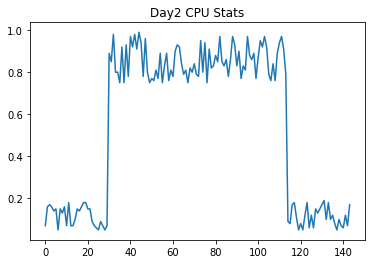

In [20]:
draw_pic('Day2 CPU Stats', day2_stats)

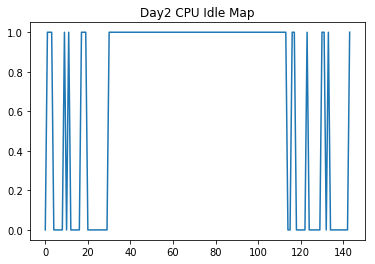

In [21]:
draw_pic('Day2 CPU Idle Map', day2_idle_map)

In [22]:
print(day3_stats)
print(calc_idle_threshold(day3_stats))
print(day3_idle_map)
show_idle_time_windows(day3_idle_time_windows)

[0.17, 0.17, 0.13, 0.05, 0.08, 0.07, 0.06, 0.15, 0.1, 0.15, 0.17, 0.19, 0.08, 0.05, 0.11, 0.06, 0.1, 0.12, 0.09, 0.15, 0.08, 0.07, 0.11, 0.1, 0.06, 0.18, 0.15, 0.08, 0.12, 0.11, 0.93, 0.98, 0.82, 0.82, 0.89, 0.84, 0.9, 0.92, 0.99, 0.89, 0.94, 0.76, 0.88, 0.89, 0.83, 0.97, 0.83, 0.92, 0.96, 0.81, 0.76, 0.8, 0.95, 0.87, 0.98, 0.79, 0.8, 0.87, 0.94, 0.83, 0.77, 0.8, 0.77, 0.85, 0.8, 0.89, 0.98, 0.8, 0.82, 0.98, 0.97, 0.78, 0.81, 0.8, 0.84, 0.97, 0.97, 0.91, 0.91, 0.84, 0.87, 0.82, 0.9, 0.87, 0.86, 0.83, 0.86, 0.87, 0.76, 0.94, 0.95, 0.87, 0.77, 0.85, 0.86, 0.98, 0.76, 0.96, 0.99, 0.92, 0.75, 0.86, 0.85, 0.85, 0.94, 0.91, 0.77, 0.75, 0.76, 0.82, 0.81, 0.88, 0.86, 0.82, 0.08, 0.18, 0.16, 0.09, 0.15, 0.07, 0.13, 0.16, 0.12, 0.1, 0.18, 0.13, 0.18, 0.17, 0.19, 0.19, 0.18, 0.12, 0.19, 0.07, 0.08, 0.14, 0.15, 0.18, 0.07, 0.15, 0.17, 0.16, 0.13, 0.12]
0.17
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

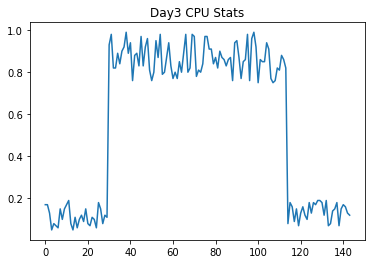

In [23]:
draw_pic('Day3 CPU Stats', day3_stats)

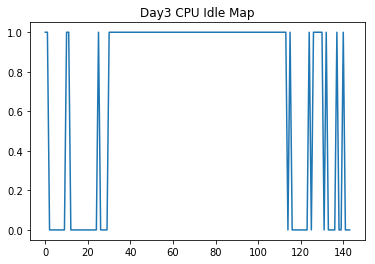

In [24]:
draw_pic('Day3 CPU Idle Map', day3_idle_map)

In [25]:
merged_idle_map = merge_idle_map(day1_idle_map, day2_idle_map)
merged_idle_map = merge_idle_map(merged_idle_map, day3_idle_map)

print(merged_idle_map)

merged_idle_time_windows = collect_idle_time_windows(merged_idle_map)
show_idle_time_windows(merged_idle_time_windows)

[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1]

02:00 ~ 02:50 -> 50  minutes
19:40 ~ 20:30 -> 50  minutes
03:20 ~ 04:00 -> 40  minutes
00:40 ~ 01:10 -> 30  minutes
04:30 ~ 05:00 -> 30  minutes
22:30 ~ 22:50 -> 20  minutes
23:00 ~ 23:20 -> 20  minutes
01:20 ~ 01:30 -> 10  minutes
23:30 ~ 23:40 -> 10  minutes


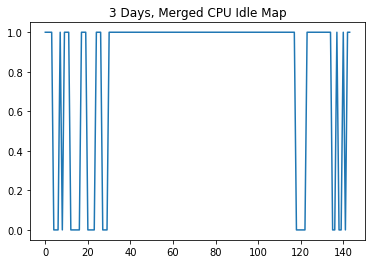

In [26]:
idle_map = merged_idle_map
#idle_map = []
#for index,value in enumerate(merged_idle_map):
#    if index % NR_SAMPLES_PER_HOUR == 0:
#        idle_map.append(value)

draw_pic('3 Days, Merged CPU Idle Map', idle_map)